In [0]:
# conda install beautifulsoup4 lxml requests pillow
import requests
from bs4 import BeautifulSoup, SoupStrainer
from PIL import Image
import io

In [0]:
r = requests.get('https://www.apple.com/itunes/charts/free-apps/')

In [0]:
r.text

# Parse html

In [0]:
soup = BeautifulSoup(r.text, 'lxml', parse_only=SoupStrainer('img'))

In [0]:
type(soup)

bs4.BeautifulSoup

In [0]:
print(soup.prettify())

<!DOCTYPE html>
<img alt="Thunder" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/574dab482cd37fc6c00f8fc400335cdfa4b3b898cf28bfa9e5e5796b4983179d.jpg" width="100"/>
<img alt="Look What You Made Me Do" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/42a59304cef80c12f94b13d6ac2cbb37ab13d53ae9f6b5160bcae3282e8546d8.jpg" width="100"/>
<img alt="Feel It Still" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/91bfa028260daace21d1e1af16e91b129ff904cd55351c4b7373264763607af5.jpg" width="100"/>
<img alt="Good Old Days (feat. Kesha)" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/6b095c6b0086bc80ecaf8164b1a30d23476e864472528a4f0b4ae1f8beac5121.jpg" width="100"/>
<img alt="Too Good at Goodbyes" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/7d3f607a552acfa23460e5560ce8b9070c53cecbd6f1340bb9bc25d21cec9180.jpg" width="100"/>
<img alt="Perfect" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/5fff

# Find all img tags

In [0]:
img_tags = soup.find_all('img')

In [0]:
img_tags

[<img alt="tbh­" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/68a041ab30849ac1c868890952c9e4265a884831b577a0a9c4579b9012047a5b.jpg" width="100"/>,
 <img alt="Instagram" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/8caeb1b01267abd15696c57df49d2e4ca1937f51256738064db2aa365433fa80.jpg" width="100"/>,
 <img alt="YouTube" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/5201041be4199895239e4f35b16f30c04d96dfd64cfbe4f124467315df8fd3fb.jpg" width="100"/>,
 <img alt="Bitmoji - Your Personal Emoji" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/9e83f0431cc4eb1fa3ee2f346ff8f08891a20e71f9d0265d0f6bd3c7e6918efa.jpg" width="100"/>,
 <img alt="Snapchat" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/a312826181acc14331df9eb32b66cc070bf368a2cfec4deb6a623002442610bf.jpg" width="100"/>,
 <img alt="Messenger" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/8ab53dd1c07c26233

# Access img_tags object 

In [0]:
img_tags[1]

<img alt="Look What You Made Me Do" height="100" src="/autopush/us/itunes/charts/songs/images/2017/9/42a59304cef80c12f94b13d6ac2cbb37ab13d53ae9f6b5160bcae3282e8546d8.jpg" width="100"/>

In [0]:
img_tags[1]['alt']

'Instagram'

In [0]:
img_tags[1]['src']

'/autopush/us/itunes/charts/free-apps/images/2017/9/8caeb1b01267abd15696c57df49d2e4ca1937f51256738064db2aa365433fa80.jpg'

In [0]:
img_tags[1].attrs

{'alt': 'Instagram',
 'height': '100',
 'src': '/autopush/us/itunes/charts/free-apps/images/2017/9/8caeb1b01267abd15696c57df49d2e4ca1937f51256738064db2aa365433fa80.jpg',
 'width': '100'}

# get a single image

In [0]:
url='https://www.apple.com/autopush/us/itunes/charts/free-apps/images/2017/9/8caeb1b01267abd15696c57df49d2e4ca1937f51256738064db2aa365433fa80.jpg'

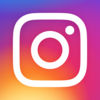

In [0]:
r1=requests.get(url)
img=Image.open(io.BytesIO(r1.content))
img

# get the first five img_tags 

In [0]:
img_tags[:5]

[<img alt="tbh­" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/68a041ab30849ac1c868890952c9e4265a884831b577a0a9c4579b9012047a5b.jpg" width="100"/>,
 <img alt="Instagram" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/8caeb1b01267abd15696c57df49d2e4ca1937f51256738064db2aa365433fa80.jpg" width="100"/>,
 <img alt="YouTube" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/5201041be4199895239e4f35b16f30c04d96dfd64cfbe4f124467315df8fd3fb.jpg" width="100"/>,
 <img alt="Bitmoji - Your Personal Emoji" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/9e83f0431cc4eb1fa3ee2f346ff8f08891a20e71f9d0265d0f6bd3c7e6918efa.jpg" width="100"/>,
 <img alt="Snapchat" height="100" src="/autopush/us/itunes/charts/free-apps/images/2017/9/a312826181acc14331df9eb32b66cc070bf368a2cfec4deb6a623002442610bf.jpg" width="100"/>]

# Get the first five img_tags

In [0]:
prefix='https://www.apple.com'
for e in img_tags[:5]:
    url = prefix + e['src']
    r1=requests.get(url)
    img=Image.open(io.BytesIO(r1.content))
    img.save(e['alt']+'.jpg')

# Get all img_tags

In [0]:
prefix='https://www.apple.com'
for e in img_tags:
    url = prefix + e['src']
    r1=requests.get(url)
    img=Image.open(io.BytesIO(r1.content))
    img.save('icons/' + e['alt']+'.jpg')